# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import plot_tree
from sklearn.metrics import r2_score

In [11]:
xtest = pd.read_csv("X_teste_ajustado.csv")
xtre = pd.read_csv("X_train_ajustado.csv")


ytre = pd.read_csv("y_train.txt")
ytes = pd.read_csv("y_test.txt")

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.046467,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563


### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [13]:
xtre =  xtre.drop(index=1)
xvalid, xtre, yvalid, ytre = train_test_split(xtre,ytre, test_size=.25, random_state=1729)

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [20]:
#summary

model = DecisionTreeClassifier(random_state=236073, max_depth= 4)
model = model.fit(xtre,ytre)


importances = model.feature_importances_
importances

feature_importances = pd.DataFrame({
    'Variável': xtre.columns,
    'Importância': importances
})

feature_importances = feature_importances.sort_values(by='Importância', ascending=False)

print(feature_importances)


                           Variável  Importância
56           tGravityAcc-energy()-X     0.282940
381  fBodyAccJerk-bandsEnergy()-1,8     0.249839
559            angle(Y,gravityMean)     0.152647
504               fBodyAccMag-mad()     0.148703
69        tGravityAcc-arCoeff()-Y,1     0.124508
..                              ...          ...
183       tBodyGyroJerk-entropy()-Y     0.000000
182       tBodyGyroJerk-entropy()-X     0.000000
181           tBodyGyroJerk-iqr()-Z     0.000000
180           tBodyGyroJerk-iqr()-Y     0.000000
560            angle(Z,gravityMean)     0.000000

[561 rows x 2 columns]


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [21]:
xvalid.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
3230,0.347982,-0.000713,-0.145880,-0.332666,-0.051265,0.103004,-0.367037,-0.073781,0.099609,-0.291338,...,-0.097903,-0.381269,-0.741718,-0.749949,-0.535772,-0.999790,-0.072399,-0.578859,-0.042568,0.282000
6854,0.281557,-0.018647,-0.116641,-0.995599,-0.981017,-0.972927,-0.995663,-0.978353,-0.968272,-0.937026,...,0.461623,-0.490316,-0.814066,0.004834,-0.197311,-0.296803,0.275845,-0.697927,-0.036562,-0.149896
5190,0.282843,-0.019812,-0.088974,-0.550827,-0.079008,-0.403517,-0.570443,-0.085220,-0.408548,-0.436641,...,0.053556,-0.090560,-0.420796,-0.286425,0.591246,0.838658,-0.592177,-0.705018,0.159092,-0.185179
6264,0.301379,-0.009898,-0.157724,-0.954767,-0.838997,-0.903815,-0.959532,-0.861006,-0.904764,-0.842703,...,-0.230024,-0.253711,-0.669864,-0.158135,0.131733,0.011922,-0.015567,-0.769797,0.255702,0.040440
889,0.279717,-0.007285,-0.008202,-0.976234,-0.941793,-0.800769,-0.977891,-0.945371,-0.785781,-0.909700,...,0.230883,-0.237865,-0.572224,0.034656,0.389312,-0.106330,-0.227850,-0.930107,0.132258,0.054314


In [26]:

colunas_desejadas = ['tGravityAcc-energy()-X','fBodyAccJerk-bandsEnergy()-1,8', 'angle(Y,gravityMean)']

try:
    xva = xvalid[colunas_desejadas]
    print("DataFrame filtrado:")
except KeyError as e:
    print(f"Erro ao acessar colunas: {e}")

DataFrame filtrado:


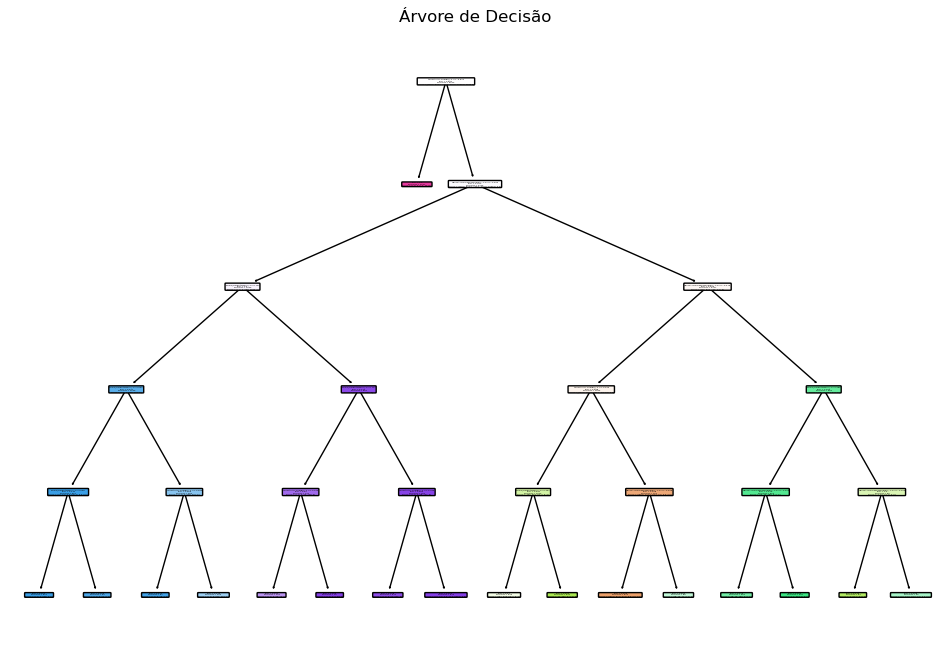

CPU times: total: 2.11 s
Wall time: 2.19 s


In [55]:
%%time


modelbest = DecisionTreeClassifier(random_state=236073, max_depth=5)
modelbest.fit(xva,yvalid)



path = modelbest.cost_complexity_pruning_path(xva, yvalid)
ccp_alphas = path.ccp_alphas

plt.figure(figsize=(12, 8))  
plot_tree(modelbest, 
          feature_names=['tGravityAcc-energy()-X','fBodyAccJerk-bandsEnergy()-1,8', 'angle(Y,gravityMean)'],
          filled=True, 
          rounded=True) 

plt.title("Árvore de Decisão")
plt.show()


ccp_alphas = path.ccp_alphas
ccp_alphas_selecionados = ccp_alphas[:2]
arvor = []

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

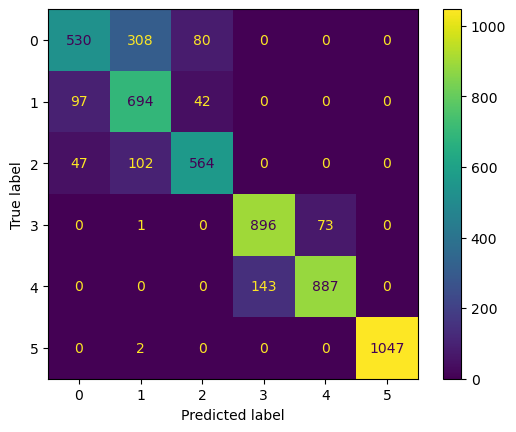

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

modelbest = DecisionTreeClassifier(random_state=236073, max_depth=5, ccp_alpha=5.7843983428789705e-05)
modelbest.fit(xva,yvalid)

y_pred = modelbest.predict(xva)
cm =confusion_matrix(yvalid, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [61]:
arr = []
for alpha in ccp_alphas_selecionados:
    arvore = DecisionTreeClassifier(random_state=236073, ccp_alpha = alpha, min_samples_leaf=20)
    arvore.fit(xva,yvalid)
    arr.append(arvore)

for i, arv in enumerate(arr):
    print(f"arvore{i+1} com cpp alpha={ccp_alphas_selecionados[i]}")
    print("acuracia=" ,arvore.score(xva,yvalid))



arvore1 com cpp alpha=0.0
acuracia= 0.897696354072193
arvore2 com cpp alpha=5.7843983428789705e-05
acuracia= 0.897696354072193


In [65]:
y_pred = modelbest.predict(xva)

r2 = r2_score(yvalid, y_pred)
print(f"O valor de R^2 é: {r2}")



O valor de R^2 é: 0.9221009992680869
